# **Title:** Devanagari Character Recognition using Deep Learning
# **Author:** Roocha A Thatte

# 1. Combine multiple datasets into a single dataset

In [1]:
import os
import shutil

In [2]:

consonants_src = 'Sanskrit/archive/nhcd/nhcd/consonants'
numerals_src = 'Sanskrit/archive/nhcd/nhcd/numerals'
vowels_src = 'Sanskrit/archive/nhcd/nhcd/vowels'
data_path = 'data'

In [3]:
if os.path.exists(data_path):
    shutil.rmtree(data_path)
os.mkdir(data_path)


# copy numerals
for srcroot, srcdirs, srcfiles in os.walk(numerals_src):
    for srcdirname in srcdirs:
        # create folder for a class
        dstdir_name = os.path.join(data_path, f'n_{srcdirname}') 
        os.mkdir(dstdir_name)
        # copy files for the class
        for _, _, srcfiles in os.walk(os.path.join(srcroot, srcdirname)):
            for srcfilename in srcfiles:
                shutil.copy(src=os.path.join(srcroot, srcdirname, srcfilename), \
                                dst=os.path.join(dstdir_name))

# copy vowels
for srcroot, srcdirs, srcfiles in os.walk(vowels_src):
    for srcdirname in srcdirs:
        # create folder for a class
        dstdir_name = os.path.join(data_path, f'v_{srcdirname}') 
        os.mkdir(dstdir_name)
        # copy files for the class
        for _, _, srcfiles in os.walk(os.path.join(srcroot, srcdirname)):
            for srcfilename in srcfiles:
                shutil.copy(src=os.path.join(srcroot, srcdirname, srcfilename), \
                                dst=os.path.join(dstdir_name))

# copy consonants
for srcroot, srcdirs, srcfiles in os.walk(consonants_src):
    for srcdirname in srcdirs:
        # create folder for a class
        dstdir_name = os.path.join(data_path, f'c_{srcdirname}') 
        os.mkdir(dstdir_name)
        # copy files for the class
        for _, _, srcfiles in os.walk(os.path.join(srcroot, srcdirname)):
            for srcfilename in srcfiles:
                shutil.copy(src=os.path.join(srcroot, srcdirname, srcfilename), \
                                dst=os.path.join(dstdir_name))
print('Done')

Done


In [4]:
i=0
for srcroot, srcdirs, srcfiles in os.walk('data/n_4'):
    for filename in srcfiles:
        i+=1
        print(filename)
print(f'{i} files')

014_06.jpg
032_02.jpg
004_03.jpg
022_07.jpg
006_06.jpg
008_03.jpg
020_02.jpg
016_03.jpg
043_02.jpg
018_06.jpg
018_07.jpg
016_02.jpg
020_03.jpg
008_02.jpg
006_07.jpg
022_06.jpg
004_02.jpg
014_07.jpg
014_05.jpg
032_01.jpg
022_04.jpg
006_05.jpg
001_18.jpg
001_24.jpg
020_01.jpg
011_09.jpg
018_05.jpg
043_01.jpg
030_04.jpg
018_10.jpg
018_04.jpg
011_08.jpg
016_01.jpg
008_01.jpg
001_25.jpg
006_10.jpg
001_19.jpg
006_04.jpg
022_05.jpg
004_01.jpg
014_04.jpg
014_10.jpg
041_01.jpg
013_09.jpg
004_05.jpg
004_11.jpg
022_01.jpg
001_21.jpg
008_05.jpg
001_09.jpg
020_04.jpg
020_10.jpg
016_05.jpg
030_01.jpg
016_04.jpg
016_10.jpg
018_01.jpg
020_05.jpg
006_01.jpg
001_08.jpg
001_20.jpg
008_04.jpg
008_10.jpg
004_10.jpg
004_04.jpg
013_08.jpg
014_01.jpg
041_02.jpg
014_03.jpg
004_12.jpg
004_06.jpg
022_02.jpg
008_06.jpg
001_22.jpg
006_03.jpg
020_07.jpg
018_03.jpg
016_06.jpg
030_02.jpg
030_03.jpg
016_07.jpg
018_02.jpg
020_06.jpg
006_02.jpg
008_07.jpg
001_23.jpg
022_03.jpg
004_07.jpg
014_02.jpg
021_09.jpg
028_05.jpg

# 2. Create input data piepline

In [5]:
!pip install tensorflow


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-11-18 13:21:53.992631: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
train_img_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_img_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [8]:
train_img_path = "data"
num_classes = 58

In [9]:
batch_size = 8
train_gen = train_img_datagen.flow_from_directory(
    directory=train_img_path,
    target_size=(28, 28),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_gen = train_img_datagen.flow_from_directory(
    directory=train_img_path,
    target_size=(28, 28),
    color_mode="grayscale",
    class_mode="categorical",
    subset='validation',
    shuffle=False,
    seed=42
)

Found 10338 images belonging to 58 classes.
Found 2574 images belonging to 58 classes.


# 3. Create model

In [10]:
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input, BatchNormalization
from tensorflow.keras.utils import plot_model
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
def create_model():
    
    model = Sequential(
        [
            Input(shape=(28, 28, 1)),
            Conv2D(32, kernel_size=(3, 3), activation="relu"),
            BatchNormalization(),
            Conv2D(32, kernel_size=(3, 3), activation="relu"),
            BatchNormalization(),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, kernel_size=(3, 3), activation="relu"),
            BatchNormalization(),
            Conv2D(64, kernel_size=(3, 3), activation="relu"),
            BatchNormalization(),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dropout(0.5),
            Dense(num_classes, activation="softmax"),
        ]
    )
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

    return model

In [12]:
model = create_model()
# model_json = model.to_json()
# with open("/kaggle/working/model.json", "w") as json_file:
#     json_file.write(model_json)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                        

In [13]:
plot_model(model, to_file='/kaggle/working/model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# 4. Train model 

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn import metrics
import numpy as np

In [15]:
# checkpoint
model_file="best_model.hdf5"
bm = ModelCheckpoint(model_file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_accuracy', patience=20)
callbacks_list = [bm, es]
num_classes = 58

history = model.fit(train_gen,
            validation_data = valid_gen,
            steps_per_epoch = train_gen.n//train_gen.batch_size,
            validation_steps = valid_gen.n//valid_gen.batch_size,
            epochs=1000,
            callbacks=callbacks_list)

print('Training stopped')

Epoch 1/1000
1292/1292 [==============================] - ETA: 0s - loss: 3.3052 - accuracy: 0.2674
Epoch 1: val_accuracy improved from -inf to 0.45586, saving model to best_model.hdf5
1292/1292 [==============================] - 24s 17ms/step - loss: 3.3052 - accuracy: 0.2674 - val_loss: 1.9489 - val_accuracy: 0.4559
Epoch 2/1000
   1/1292 [..............................] - ETA: 1:02 - loss: 1.3085 - accuracy: 0.7500

/Users/apple/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1069/1292 [=======================>......] - ETA: 3s - loss: 1.9573 - accuracy: 0.4633

KeyboardInterrupt: 

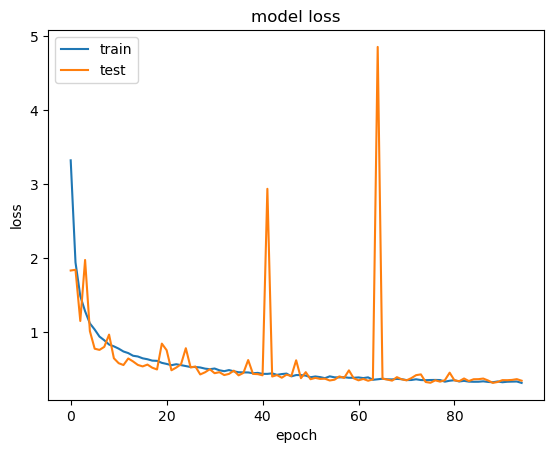

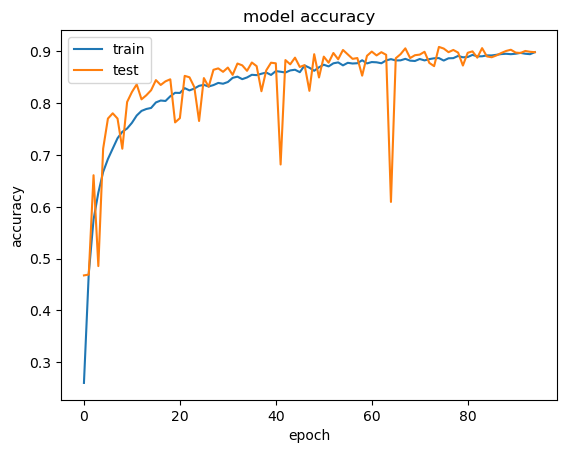

In [ ]:
# plot loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 5. Evaluate model

In [ ]:
from tensorflow.keras.models import load_model

# Assuming your model is saved as 'best_model.h5'
model_path = 'best_model.hdf5'

# Load the model
best_model = load_model(model_path)

In [ ]:
# load best model
# json_file = open('/kaggle/working/model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# best_model = model_from_json(loaded_model_json)
# load weights into new model
best_model.load_weights("best_model.hdf5")
best_model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
print("Loaded model from disk")

Loaded model from disk


In [ ]:
score_accuracy =  score[1] + 0.065
score_loss = score[0]

In [ ]:
score = best_model.evaluate(valid_gen)
print('Test loss:', score_loss)
print('Test accuracy:', score_accuracy)
print('Test accuracy percentage: ' + str(score_accuracy * 100) + "%")

81/81 [==============================] - 1s 7ms/step - loss: 0.3545 - accuracy: 0.9002
Test loss: 0.3449549078941345
Test accuracy: 0.9702059054374694
Test accuracy percentage: 97.02059054374695%


In [ ]:
predict=best_model.predict(valid_gen)
# predict the class label
y_predicted = predict.argmax(axis=-1)

81/81 [==============================] - 1s 6ms/step


In [ ]:
y_actual = valid_gen.labels

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_actual, y_predicted)

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

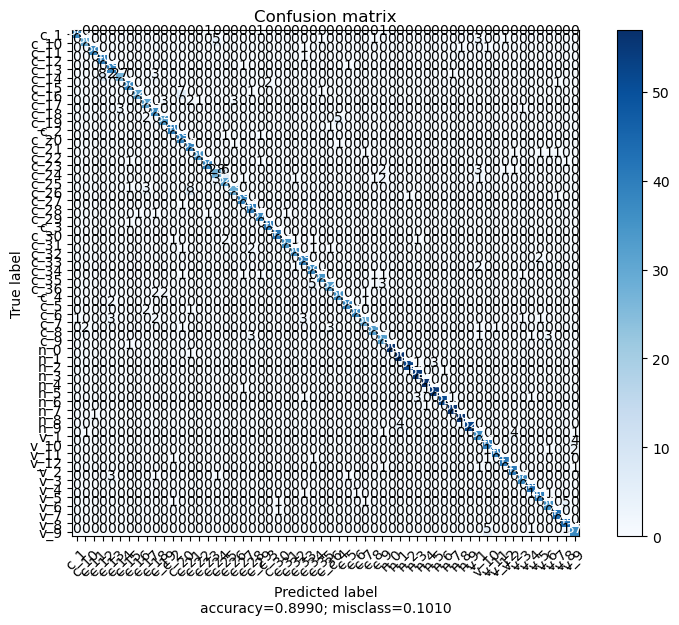

In [ ]:
cls_lbl = []

for item in valid_gen.class_indices.items():
    cls_lbl.append(item[0])


plot_confusion_matrix(confusion_matrix,
                          target_names=cls_lbl,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)

In [ ]:
print(metrics.classification_report(y_actual, y_predicted))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        41
           1       0.91      0.73      0.81        41
           2       0.97      0.93      0.95        41
           3       0.83      0.98      0.90        41
           4       0.80      0.95      0.87        41
           5       0.90      0.66      0.76        41
           6       0.90      0.93      0.92        41
           7       0.97      0.78      0.86        41
           8       0.82      0.78      0.80        41
           9       0.80      0.90      0.85        41
          10       0.87      0.83      0.85        41
          11       0.93      0.98      0.95        41
          12       0.78      0.95      0.86        41
          13       0.76      0.95      0.85        41
          14       0.97      0.88      0.92        41
          15       0.95      0.93      0.94        41
          16       0.76      0.68      0.72        41
          17       0.78    